# 创建验证码数据集

## 引入第三方包

In [1]:
!pip install -i https://pypi.tuna.tsinghua.edu.cn/simple captcha 
from captcha.image import ImageCaptcha

import random  #随机字符
import numpy as np  #图象表示

import tensorflow.gfile as gfile #目录文件
import matplotlib.pyplot as plt #可视化验证码图象
import PIL.Image as Image

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple


## 定义常量和字符集

In [2]:
NUMBER = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
LOWERCASE = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u',
            'v', 'w', 'x', 'y', 'z']
UPPERCASE = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U',
           'V', 'W', 'X', 'Y', 'Z']

CAPTCHA_CHARSET = NUMBER   # 验证码字符集
CAPTCHA_LEN = 4            # 验证码长度
CAPTCHA_HEIGHT = 60        # 验证码高度
CAPTCHA_WIDTH = 160        # 验证码宽度


TRAIN_DATASET_SIZE = 5000     # 验证码数据集大小
TEST_DATASET_SIZE = 1000 
TRAIN_DATA_DIR = './train-data/' # 验证码数据集目录
TEST_DATA_DIR = './test-data/'

## 生成随机字符的方法

In [3]:
# CAPTCHA_CHARSET = NUMBER 
# length = CAPTCHA_LEN，验证码长度
def gen_random_text(charset=CAPTCHA_CHARSET, length=CAPTCHA_LEN):
    # text数组长度是length即验证码长度
    # 每个元素为charset中的一个随机元素
    text = [random.choice(charset) for _ in range(length)]
    return ''.join(text)

## 创建并保存验证码数据集的方法

In [4]:
def create_captcha_dataset(size=100,  #数据集大小
                           data_dir='./data/', #保存目录
                           height=60, #高度         
                           width=160, #宽度
                           image_format='.png'): #格式

    # 如果保存验证码图像，先清空 data_dir 目录
    if gfile.Exists(data_dir):
        gfile.DeleteRecursively(data_dir)
    gfile.MakeDirs(data_dir)
    
    # 创建 ImageCaptcha 实例 captcha
    captcha = ImageCaptcha(width=width, height=height)

    for _ in range(size):
        # 生成随机的验证码字符
        text = gen_random_text(CAPTCHA_CHARSET, CAPTCHA_LEN)
        captcha.write(text, data_dir + text + image_format)
        
    return None

## 创建并保存训练集

In [5]:
# 随机生成5000次验证码图像，保存在./train-data/目录中
# 因为有概率生成相同的验证码，因此最终生成的图片数有可能小于5000
create_captcha_dataset(TRAIN_DATASET_SIZE, TRAIN_DATA_DIR)

## 创建并保存测试集

In [6]:
# 随机生成1000次验证码图像，保存在./test-data/目录中
create_captcha_dataset(TEST_DATASET_SIZE, TEST_DATA_DIR)

## 生成并返回验证码数据集的方法

In [7]:
# 生成的验证码图片，不再写到文件系统，而是保存在内存中(images数组,texts数组)
def gen_captcha_dataset(size=100,
                        height=60,                           
                        width=160,
                        image_format='.png'):

    # 创建 ImageCaptcha 实例 captcha
    captcha = ImageCaptcha(width=width, height=height)

    # 创建图像和文本数组
    images, texts = [None]*size, [None]*size
    for i in range(size):
        # 生成随机的验证码字符
        texts[i] = gen_random_text(CAPTCHA_CHARSET, CAPTCHA_LEN)
        # 使用 PIL.Image.open() 识别新生成的验证码图像 
        #   captcha.generate(...)将验证码保存ImageCaptcha对象，
        #   对象实现了python标准图像的方法，可以被Image打开
        # 然后，将图像转换为形如(CAPTCHA_WIDTH, CAPTCHA_HEIGHT, 3) 的 Numpy 数组
        images[i] = np.array(Image.open(captcha.generate(texts[i])))
        
    return images, texts


## 生成 100 张验证码图像和字符

In [8]:
# 生成100张验证码图片在内存中
images, texts = gen_captcha_dataset()

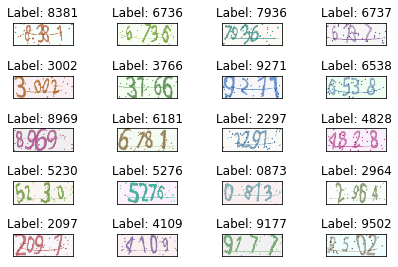

In [9]:
# 用plot将验证码图片绘制出来
plt.figure()
for i in range(20):
    plt.subplot(5,4,i+1) # 绘制前20个验证码，以5行4列子图形式展示
    plt.tight_layout() # 自动适配子图尺寸
    plt.imshow(images[i]) #绘制图片
    plt.title("Label: {}".format(texts[i])) # 设置标签为子图标题
    plt.xticks([]) # 删除x轴标记
    plt.yticks([]) # 删除y轴标记
plt.show()